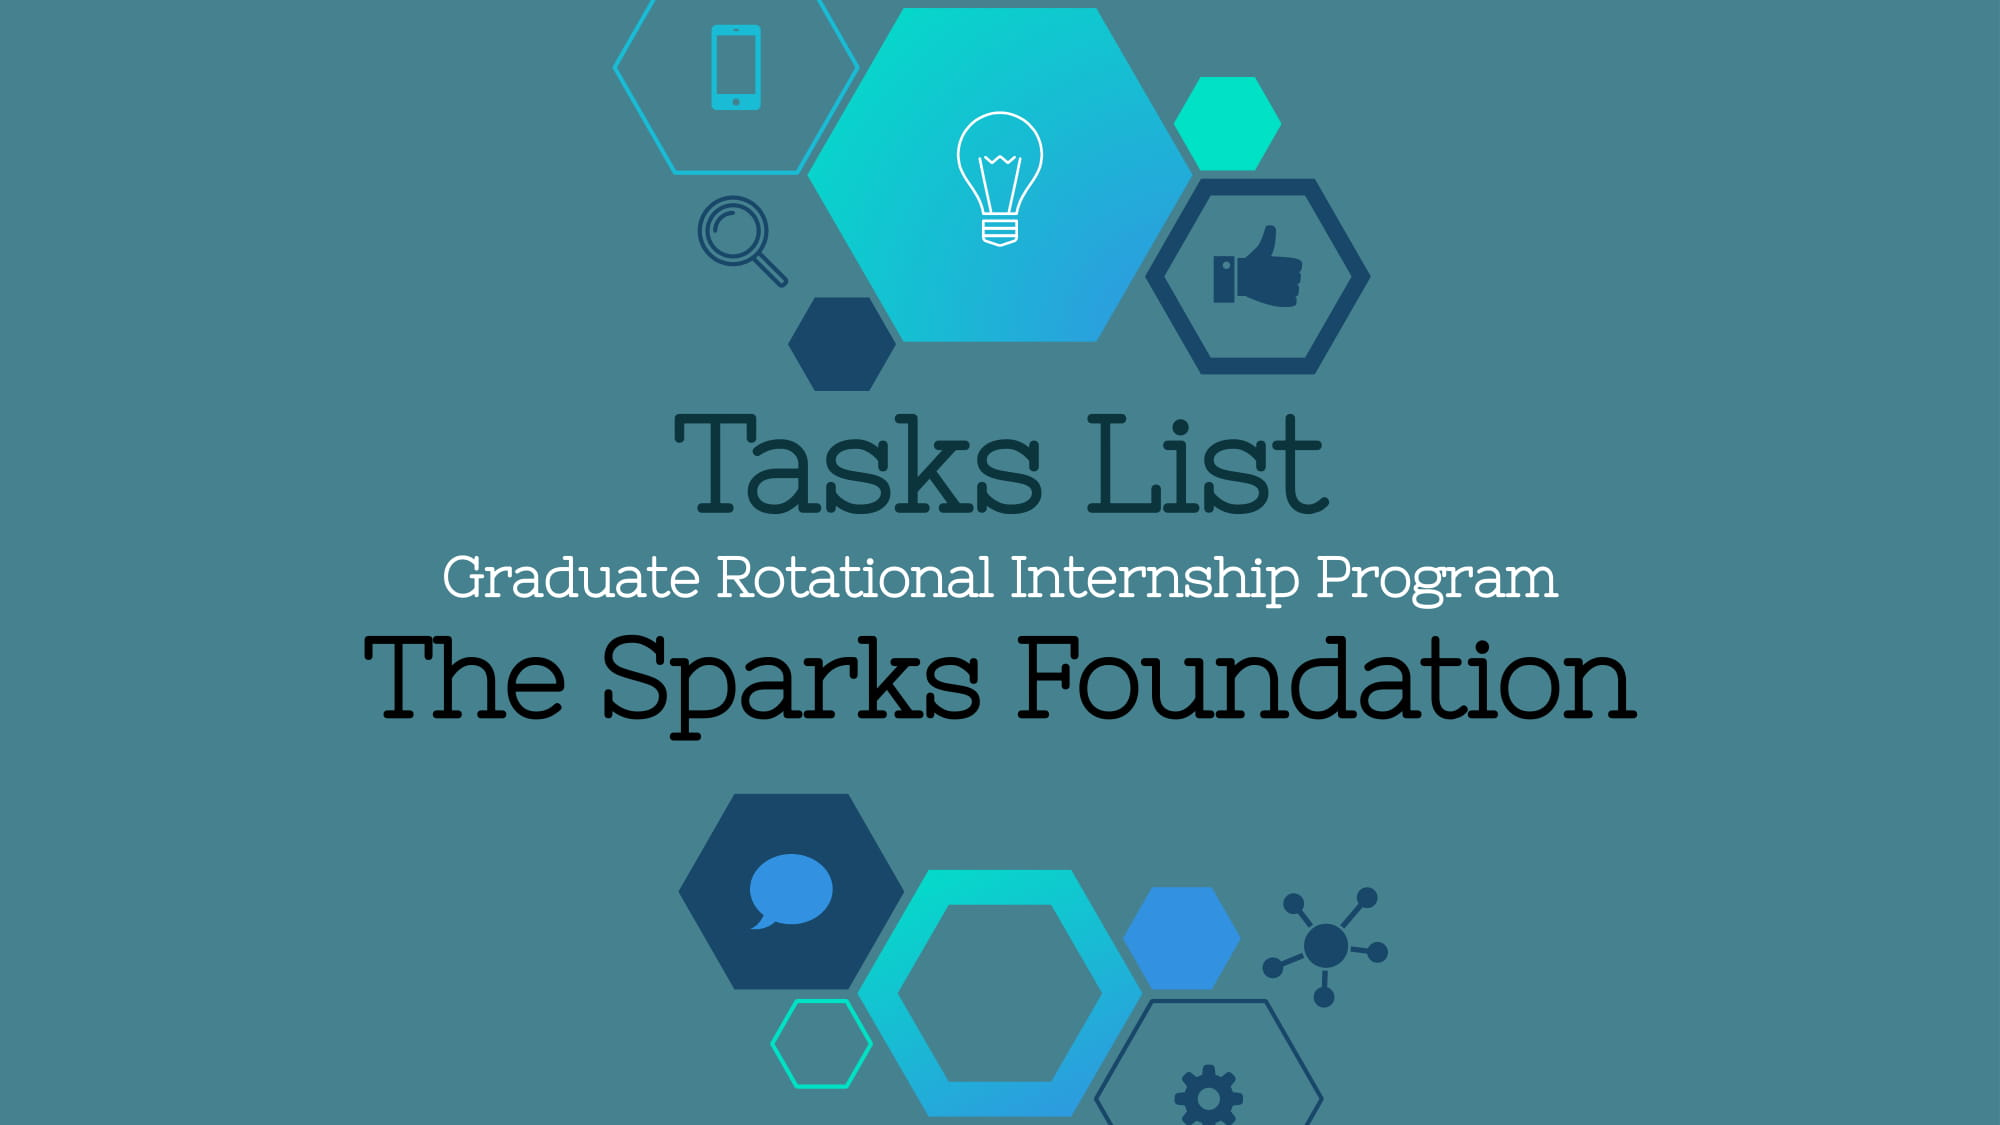

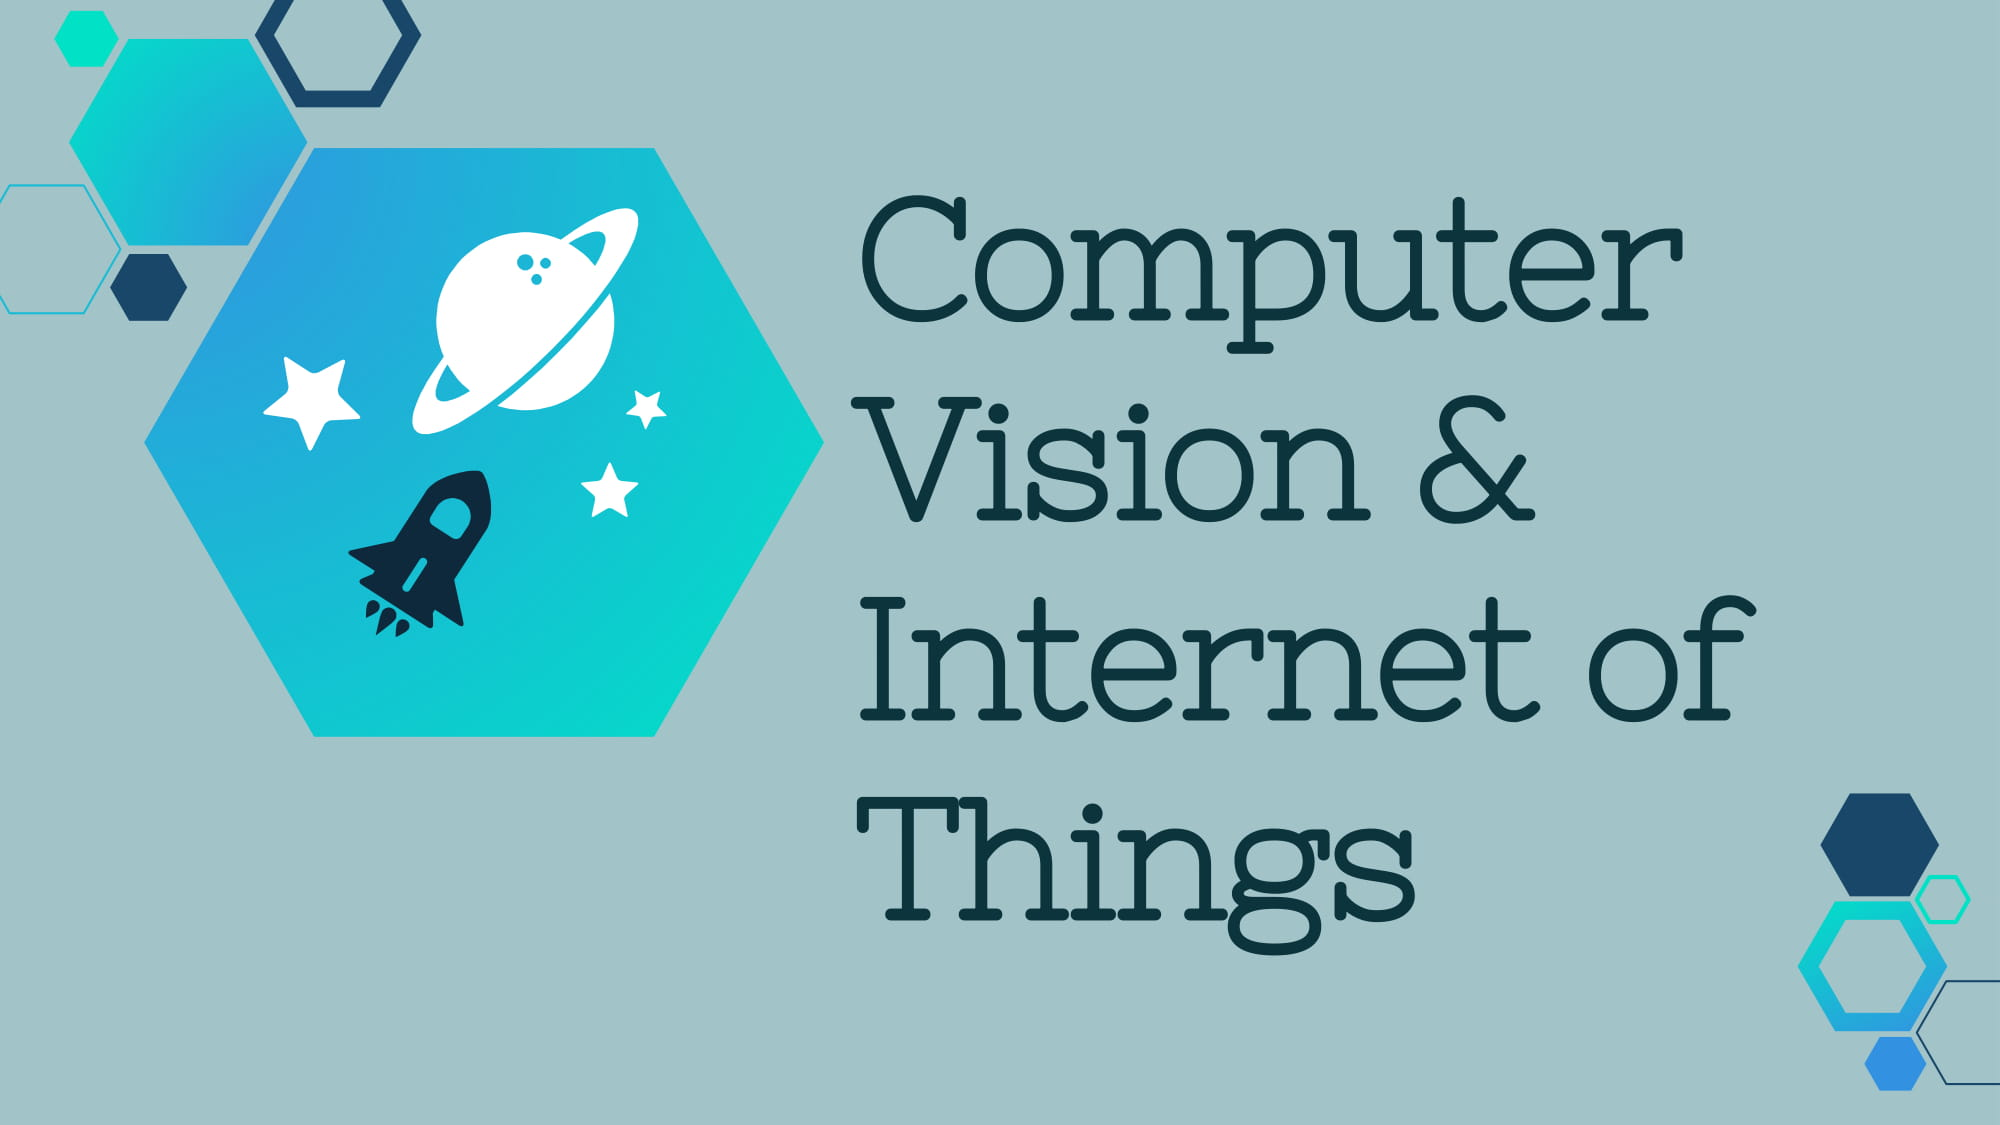

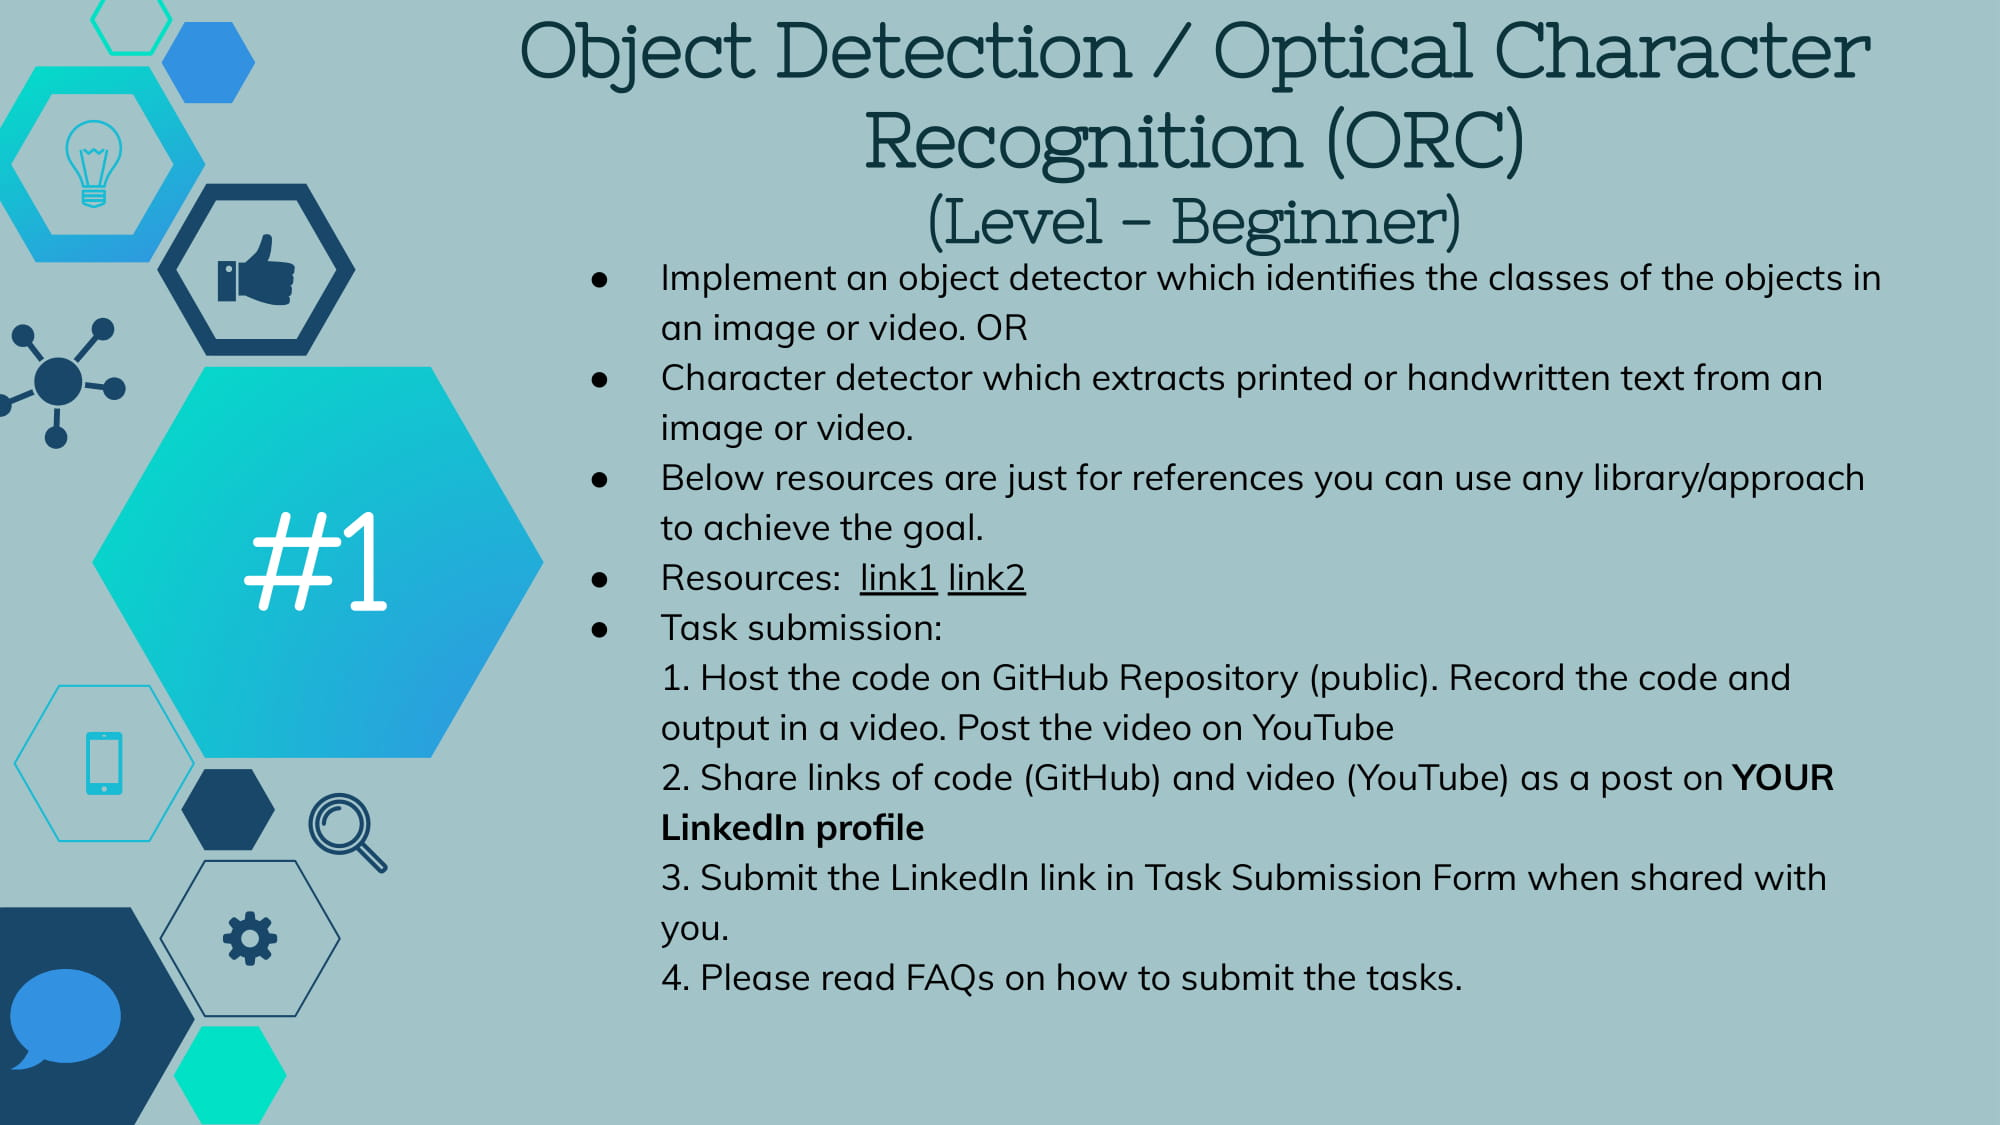

</div><h1 align="left"><a href="https://eagleanurag.github.io/" target="_blank">eagleanurag</a></h1></div>


### Hello 👋, I'm [Anurag Pandey](https://eagleanurag.github.io) & Google me as [eagleanurag](https://www.google.com/search?q=eagleanurag)



<img align="center" alt="GIF" src="https://raw.githubusercontent.com/eagleanurag/eagleanurag/master/img/ind.gif" />
<img height="225" align="center" alt="GIF" src="https://raw.githubusercontent.com/eagleanurag/eagleanurag/master/img/metyro.gif" />
<img align="center" alt="GIF" src="https://raw.githubusercontent.com/eagleanurag/eagleanurag/master/img/ind.gif" />

# **Step 1: Install Tessearct for Text Detection**

In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!git clone https://github.com/eagleanurag/TSF-Internship/tree/main/Task-1-Optical-Character-Recognition.git
%cd Document-Scanner

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Cloning into 'Document-Scanner'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.
/content/Document-Scanner/Document-Scanner


# **Step 2: Define all necessary Functions**

In [7]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

def rectify(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

def resize_image(image,width,height):
	image = cv2.resize(image,(width,height))
	return image

def gray_image(image):
	image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
	return image

def canny_edge_detection(image):
	blurred_image = cv2.GaussianBlur(image,(5,5), 0)
	edges = cv2.Canny(blurred_image,0,50)
	return edges

def find_contours(image):
	(contours, _) = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
	contours = sorted(contours, key=cv2.contourArea, reverse=True)
	for c in contours:
	    p = cv2.arcLength(c, True)
	    approx = cv2.approxPolyDP(c, 0.02 * p, True)

	    if len(approx) == 4:
	        target = approx
	        break
	return target

def draw_contours(orig_image,image, target):
	approx = rectify(target)
	pts2 = np.float32([[0,0],[800,0],[800,800],[0,800]])

	M = cv2.getPerspectiveTransform(approx,pts2)
	result = cv2.warpPerspective(image,M,(800,800))

	cv2.drawContours(image, [target], -1, (0, 255, 0), 2)
	result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
	return result



# **Step 3: Read Image**

In [ ]:
image = cv2.imread('tsf.png')
image = resize_image(image,1500,800)
orig = image.copy()
cv2_imshow(orig)

# **Step 4: Convert it into Grayscale Image**

In [ ]:
gray = gray_image(image)
cv2_imshow(gray)

# **Step 5: Perform Edge Detection**

In [ ]:
edges = canny_edge_detection(gray)
cv2_imshow(edges)

# **Step 6: Text Detection and Detect contours for paper boundary detection**

In [ ]:
target = find_contours(edges)
output = draw_contours(orig,image,target)
text = pytesseract.image_to_string(output)
print("Text Detected: \n"+text)
cv2_imshow(output)